# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('datasets/creditcard.csv')

# Data Analysis

In [3]:
# Let's take a look at the head
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check the shape of the dataframe
df.shape

(284807, 31)

In [5]:
# Check for null values, remove rows with null values if they exist
df.dropna(axis=0)
df.shape

(284807, 31)

Looking at the data above, we see that this is a classification problem where we are to decide the 'Class' at each row.

In [6]:
# Check the min, max values of the columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Check class sizes
zero = len(df[df['Class']==0])
one = len(df[df['Class']==1])
print ('% of data with class 0 =', round(zero/(zero+one)*100,2))
print ('% of data with class 1 =', round(one/(zero+one)*100,2))

% of data with class 0 = 99.83
% of data with class 1 = 0.17


# Data Modeling

Looking at our analyses above, we will now perform the following steps, in order, on the data:
- remove the 'Time' and 'Amount' columns from our training set as these do not influence the model.
- normalize our data by bringing all our data values at the same scale.
- split the data into train and test samples.
- since class 1 sample is extremely small when compared to class 0, we will use the SMOTE algorithm to balance the data (make class sizes equal).

In [8]:
dft = df.drop(axis=1, labels=['Time', 'Amount'])

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dfs = pd.DataFrame(scaler.fit_transform(dft), columns=dft.columns)

In [10]:
# split the data into X and y
X = dfs.iloc[:, dfs.columns != 'Class']
y = dfs.iloc[:, dfs.columns == 'Class']

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# run smote
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X, columns=X_train.columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['Class'])

# we can Check the numbers of our data
print("Length of oversampled data =", len(os_data_X))
print("Number of Class 0 in oversampled data =", len(os_data_y[os_data_y['Class']==0]))
print("Number of Class 1 in oversampled data =", len(os_data_y[os_data_y['Class']==1]))
print("Proportion of Class 0 in oversampled data =", len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of Class 1 in oversampled data =", len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

Using TensorFlow backend.


Length of oversampled data = 454908
Number of Class 0 in oversampled data = 227454
Number of Class 1 in oversampled data = 227454
Proportion of Class 0 in oversampled data = 0.5
Proportion of Class 1 in oversampled data = 0.5


### Logistic Regression

We will use the RFECV function that will select the optimal number of features for training the model.

In [12]:
# Build a Logistic Regression model
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfecv = RFECV(estimator=LogisticRegression(solver='liblinear'), step=1, cv=10, scoring='accuracy')
rfecv.fit(os_data_X, os_data_y.values.ravel())

print('Optimal number of features:', rfecv.n_features_)
print('Selected features:', list(os_data_X.columns[rfecv.support_]))

Optimal number of features: 22
Selected features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V18', 'V20', 'V21', 'V22', 'V23', 'V26', 'V27', 'V28']


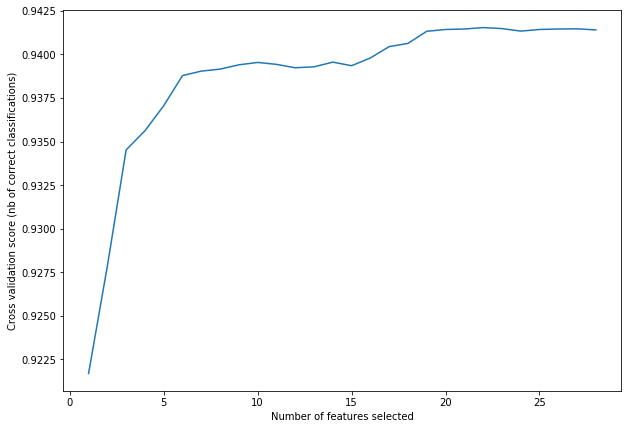

In [13]:
# Plot number of features vs. cross-validation score
plt.figure(figsize=(10,7))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [14]:
cols = list(os_data_X.columns[rfecv.support_])
X = os_data_X[cols]
y = os_data_y['Class']

In [15]:
import statsmodels.api as sm

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.140682
         Iterations 12
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.797      
Dependent Variable: Class            AIC:              128038.6485
Date:               2019-12-31 12:53 BIC:              128281.2612
No. Observations:   454908           Log-Likelihood:   -63997.    
Df Model:           21               LL-Null:          -3.1532e+05
Df Residuals:       454886           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|     [0.025     0.975] 
--------------------------------------------------------------------
V1      5.0176     0.2367     21.1980   0.0000     4.5537     5.4816
V2      0.6550     0.3920      1.6709   0.09

In [16]:
# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Print accuracy of the logistic regression model
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 99.91%


In [18]:
# Check the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[56853     8]
 [   46    55]]


In [19]:
# Check f1-score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56861
         1.0       0.87      0.54      0.67       101

    accuracy                           1.00     56962
   macro avg       0.94      0.77      0.84     56962
weighted avg       1.00      1.00      1.00     56962



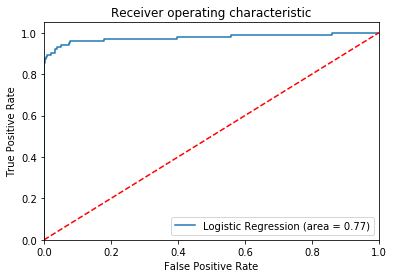

In [20]:
# Check ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Summary of Logistic Regression
- We balanced the data before training the model
- The accuracy of the model is 99.91%
- From our confusion matrix, we see that the count of total positives and total negatives are very high
- The ROC curve is very from the diagonal which also indicates a good model

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [27]:
print("Accuracy of decision tree classifier on test set: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy of decision tree classifier on test set: 99.92%


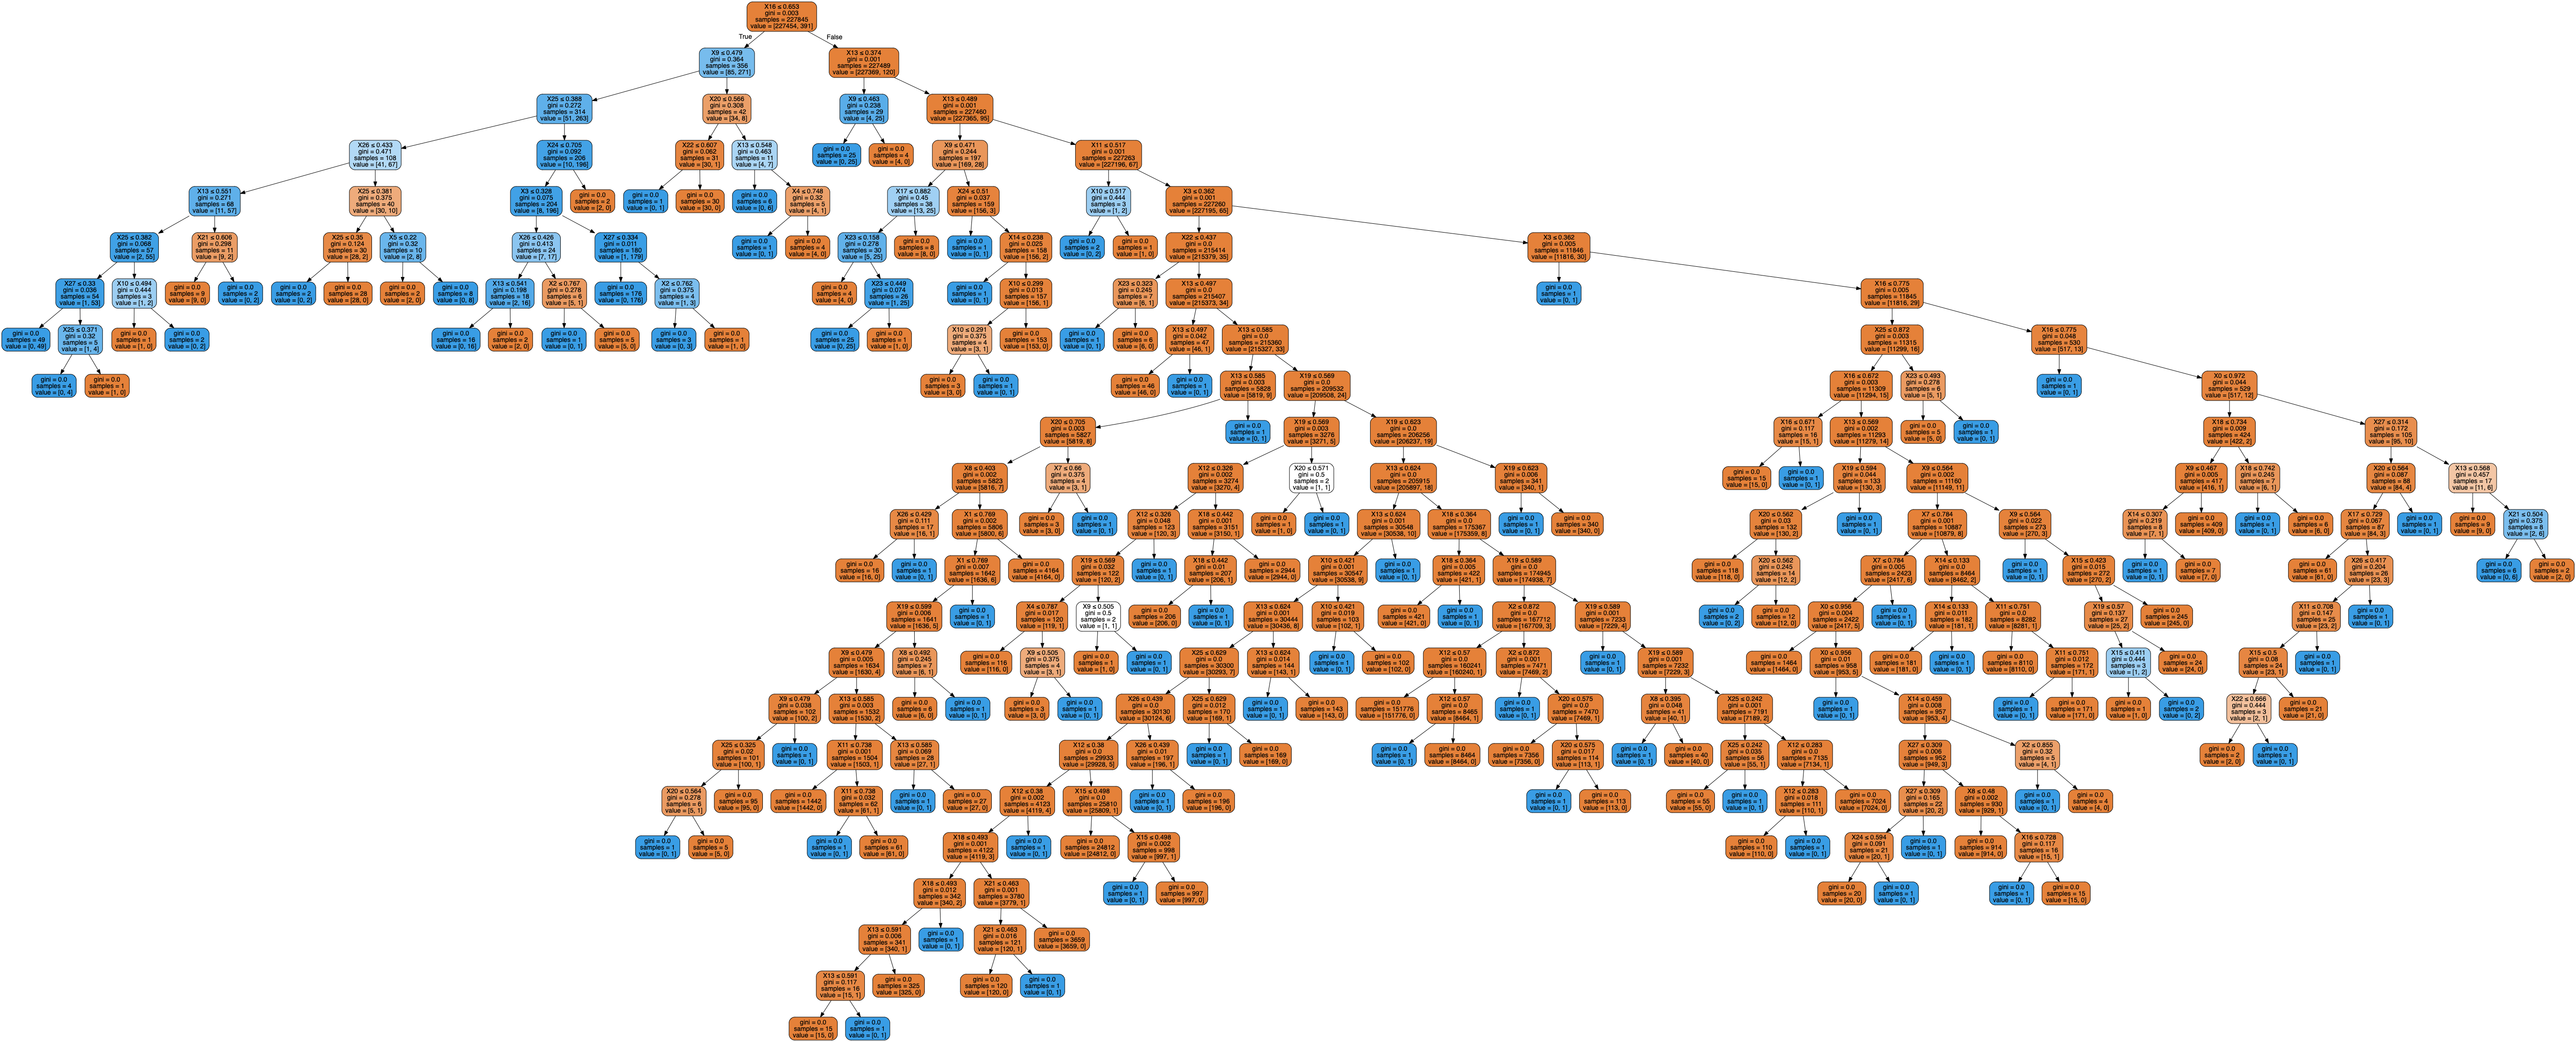

In [24]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, random_state = 0)
    gb.fit(X_train, y_train.values.ravel())
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.2f}%".format(gb.score(X_train, y_train)*100))
    print("Accuracy score (validation): {0:.2f}%".format(gb.score(X_test, y_test)*100))
    print()

Learning rate:  0.05
Accuracy score (training): 99.95%
Accuracy score (validation): 99.93%

Learning rate:  0.1
Accuracy score (training): 99.93%
Accuracy score (validation): 99.92%

Learning rate:  0.25
Accuracy score (training): 99.94%
Accuracy score (validation): 99.94%

Learning rate:  0.5
Accuracy score (training): 99.86%
Accuracy score (validation): 99.87%

Learning rate:  0.75
Accuracy score (training): 99.83%
Accuracy score (validation): 99.82%

Learning rate:  1
Accuracy score (training): 99.83%
Accuracy score (validation): 99.82%



### Summary

All three models show very high accuracy on the dataset.